In [1]:
import pandas as pd  # type: ignore
import torch  # type: ignore
import numpy as np# type: ignore
import sqlite3# type: ignore
import matplotlib.pyplot as plt# type: ignore
import seaborn as sns# type: ignore
import re# type: ignore
import nltk# type: ignore
from nltk.corpus import stopwords  # type: ignore
import tensorflow as tf     # type: ignore
from nltk.stem import WordNetLemmatizer  # type: ignore
from nltk.stem.porter import PorterStemmer # type: ignore
from sklearn.feature_extraction.text import CountVectorizer   # type: ignore
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
import sqlite3
import pandas as pd  # type: ignore
tf, tf.config.list_physical_devices("GPU"), np

(<module 'tensorflow' from 'c:\\Users\\hp\\Desktop\\Python\\Python310\\lib\\site-packages\\tensorflow\\__init__.py'>,
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')],
 <module 'numpy' from 'c:\\Users\\hp\\Desktop\\Python\\Python310\\lib\\site-packages\\numpy\\__init__.py'>)

In [2]:
df  = pd.read_csv('RRABSA.csv')
df

,id,name,email,aspect,comments,rating,Unnamed: 6
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,


In [3]:
k = 1
for i in df['comments']:
    print('(',k,')',i,end='\n')
    k = k+1

( 1 ) The tourist place had provided good services
( 2 ) The food given in the restaurant was delicious. I found it enjoyable!
( 3 ) The relaxed ambience of Thrissur was popular with temples.
( 4 ) The historical prestige and the hotel ambience was good and the service was on point. Good trip!
( 5 ) Hotel services were good
( 6 ) I became ill, so I was admitted in a hospital for 3 days.


In [4]:
sentiment = ['Good','Excellent','Good','Excellent','Very Good','Bad']
df['sentiment'] = sentiment
df

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad


<Figure size 2500x2000 with 0 Axes>

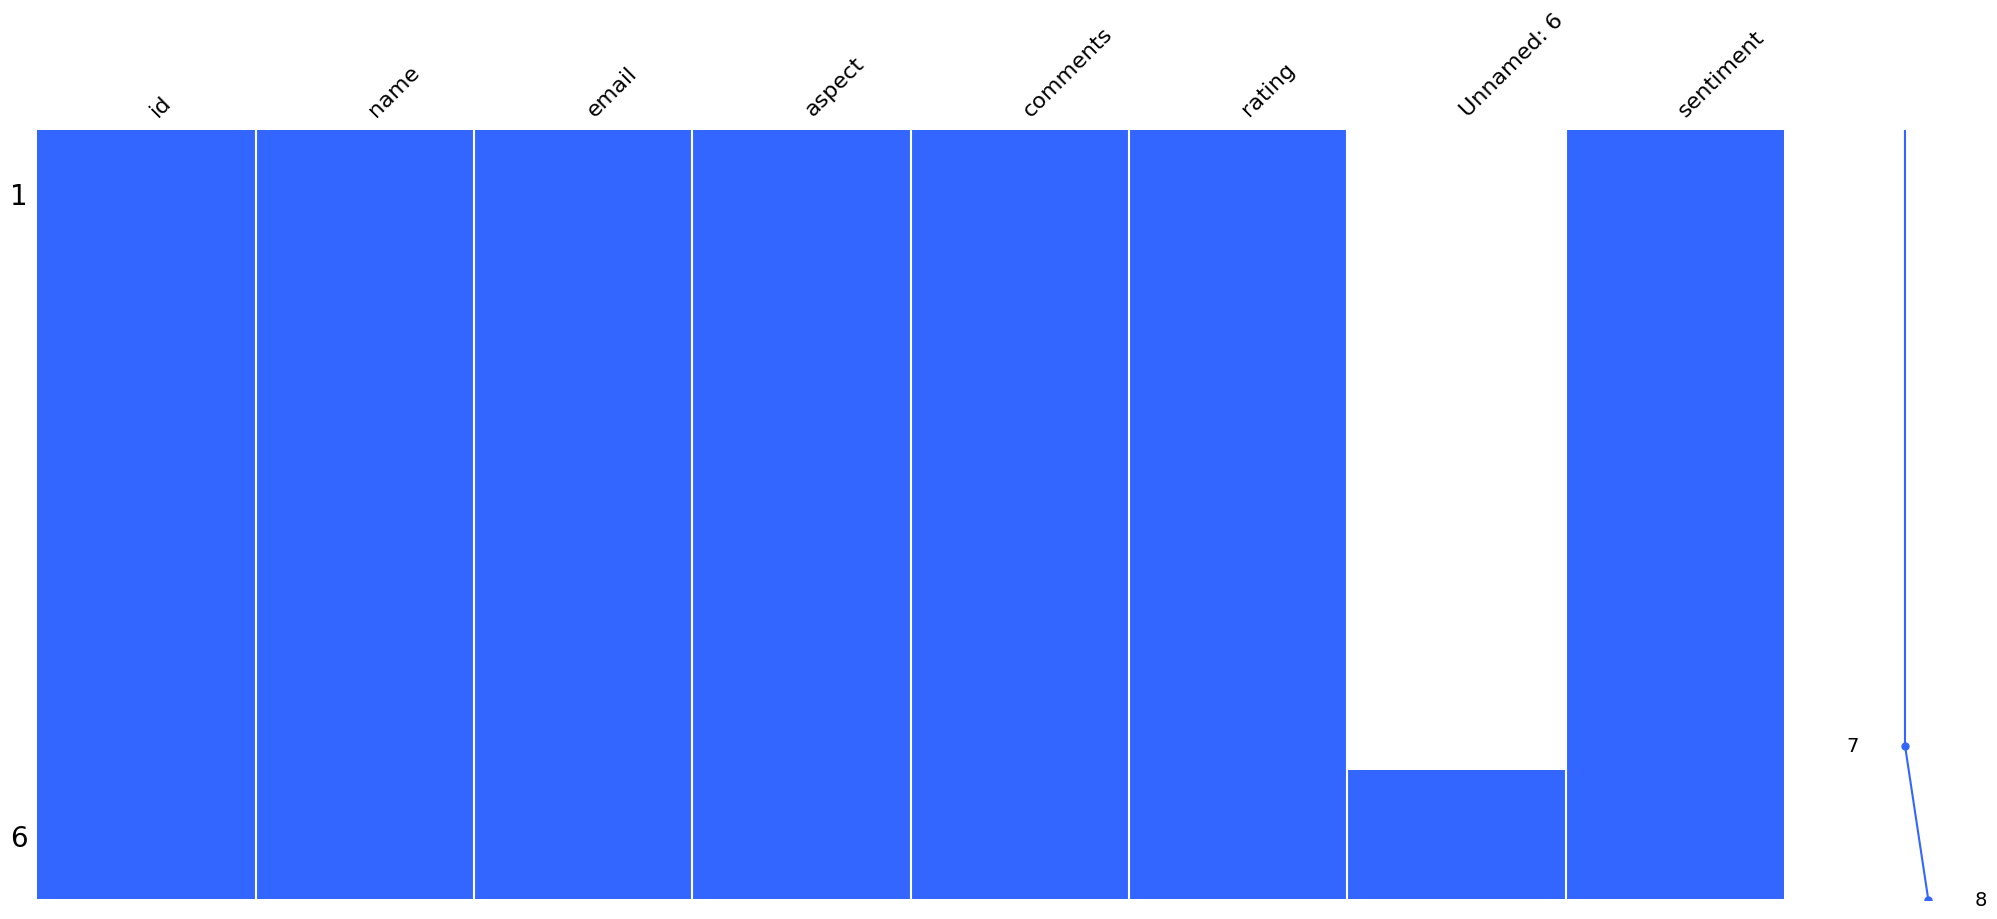

In [6]:
import missingno as msno # type: ignore
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [7]:
msno

<module 'missingno' from 'c:\\Users\\hp\\Desktop\\Python\\Python310\\lib\\site-packages\\missingno\\__init__.py'>

In [8]:
import re
def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text
# Example string with weird font characters plus an URL which we gonna remove.
sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 \n https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

Text before removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
 https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


In [9]:
print("\u00C7", "\u0043\u0327")
print("\u00C7" == "\u0043\u0327")
print("Ç" == "Ç")

Ç Ç
False
False


In [9]:
import unicodedata as uni
print(f"Text before Unicode Normalization:- \n {sample}")
sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")

Text before Unicode Normalization:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook


In [12]:
import demoji # type: ignore
def handle_emoji(string):
    emojis = demoji.findall(string)
    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])
    return string
print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

Before Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook
After Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am  smiling face with smiling eyes to create this notebook


In [13]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()
    return text
sample = "Hi Everyone I am Ankit Gupta."
print(sample)
print(word_tokenizer(sample))

Hi Everyone I am Ankit Gupta.
['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']


In [6]:
import nltk
nltk.download('stopwords')
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('words')
nltk.download('brown')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_per

True

In [16]:
from nltk.corpus import stopwords # type: ignore
en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")

Stop Words in English : 
{'yours', 'out', 'after', 'it', 'such', 'don', "it's", "aren't", 'y', 'that', "wouldn't", 'had', 'all', 'and', 'during', 'at', "won't", "don't", 'up', "needn't", 'weren', 'be', 'further', 'shouldn', "hadn't", 'now', "couldn't", 'below', 'couldn', 'most', "didn't", "shouldn't", 'into', 'has', 'on', 'then', 'each', 'll', 'a', 'mightn', 'not', 'the', 'ma', 'should', 'been', 'down', 'this', 'in', 'too', "should've", 'again', 'will', 'before', "wasn't", 'ours', 'because', 'under', 's', 'm', 'himself', 've', 'how', 'than', 'hasn', 'against', 'i', 'myself', "you're", 'nor', 'aren', 'needn', 'as', "doesn't", 'can', 'hadn', 'through', 'hers', 'yourselves', 'do', 'am', "weren't", 'you', 'ain', 'was', 'were', "hasn't", 'until', 'where', 'about', 'he', 'what', 'didn', 'isn', 'both', "she's", 'who', 'she', 'them', 'any', 't', 'whom', 'why', 'does', 'wasn', "isn't", "mustn't", 'of', 'other', 'over', "mightn't", 'haven', 'when', 'few', 'while', 'but', 'they', 'theirs', 'or', 

In [17]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text
print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

Before removing stopwords : ['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']
After removing stopwords : ['hi', 'everyone', 'ankit', 'gupta.']


In [18]:
from nltk.stem.porter import PorterStemmer # type: ignore
from nltk.stem.lancaster import LancasterStemmer # type: ignore
stemmer = PorterStemmer()
# stemmer = LancasterStemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text
sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")

Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


In [3]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 12.6 MB/s eta 0:00:01
     ----------------- ---------------------- 5.5/12.8 MB 16.0 MB/s eta 0:00:01
     --------------------------- ------------ 8.7/12.8 MB 15.3 MB/s eta 0:00:01
     ----------------------------------- --- 11.5/12.8 MB 15.0 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 14.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import numpy, spacy, tensorflow, matplotlib
numpy.__version__, spacy.__version__, tensorflow.__version__, matplotlib.__version__

('1.23.5', '3.7.5', '2.10.0', '3.8.0')

In [1]:
import matplotlib.pyplot as plt 
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\hp\\Desktop\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [2]:
import spacy # type: ignore
print(spacy.__version__)
sp = spacy.load("en_core_web_sm")

3.7.5


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [5]:
!python -m pip install numpy==1.23.5

In [22]:
import spacy # type: ignore
sp = spacy.load("en_core_web_sm")
def lemmatization(text):
    # text = [sp(word).lemma_ for word in text]
    text = " ".join(text)
    token = sp(text)
    text = [word.lemma_ for word in token]
    return text

print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


In [23]:
from langdetect import detect # type: ignore
en_text = u""""Hi Everyone I am Ankit Gupta."""
print(f" {en_text} : {detect(en_text)}")

hindi_text = u"""मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ"""
print(f"{hindi_text} : {detect(hindi_text)}")

 "Hi Everyone I am Ankit Gupta. : tl
मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ : hi


In [24]:
# Assigning labels to each review
def label(y):
    if y=='Excellent':
        return 3
    elif y=='Very Good':
        return 2
    elif y=='Good':
        return 1
    else:
        return -1

from tqdm import tqdm # type: ignore
tqdm.pandas()
df['y'] = df.sentiment.progress_map(label)
df

100%|██████████| 6/6 [00:00<00:00, 1198.66it/s]


,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1


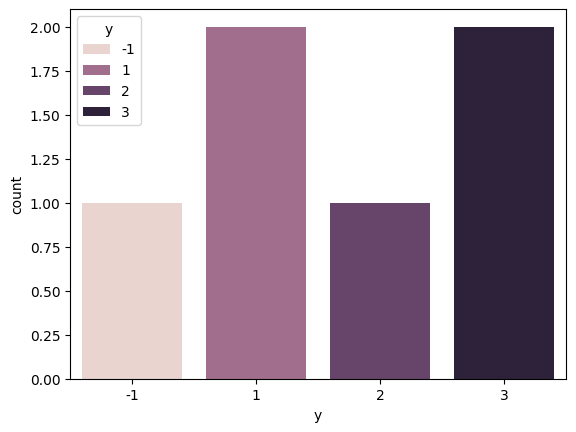

In [25]:
import seaborn as sns # type: ignore
sns.countplot(x = "y", hue="y",data = df)
plt.show()

In [26]:
P = df[(df['sentiment'] == 'Good')]
positive = list(P[(P['comments'].str.len() > 4) & (P['comments'].str.len() < 350)]['comments'])
len(positive)

2

In [27]:
import nlpaug.augmenter.word as naw # type: ignore
positive[0:49]

['The tourist place had provided good services',
 'The relaxed ambience of Thrissur was popular with temples.']

In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
import nltk # type: ignore
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [30]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=en_stopwords, tokenizer=None,
                     reverse_tokenizer=None, stopwords_regex=None, verbose=0)
aug_negative = aug.augment(positive)
len(aug_negative)

2

In [31]:
aug_negative[0:4]

['The tourist place had provided bad services',
 'The tense ambience of Thrissur was unpopular with temples.']

In [32]:
def lemmatization(text):
    # text = [sp(word).lemma_ for word in text]
    text = " ".join(text)
    token = sp(text)
    text = [word.lemma_ for word in token]
    return text

In [33]:
def preprocessing(text):
    text = remove_url(text)
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)
    return text
from tqdm import tqdm  #type: ignore
tqdm.pandas()
df['clean_review'] = df['comments'].progress_map(preprocessing)
df

100%|██████████| 6/6 [00:00<00:00, 132.81it/s]


,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day


In [34]:
df.head()

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good


In [35]:
reviews = df.clean_review.values.tolist()
from tqdm import tqdm    #type: ignore
tqdm.pandas()
df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 6/6 [00:00<?, ?it/s]


In [36]:
df

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


In [37]:
data_words = df['clean_review2'].values.tolist()
print(data_words)
print(len(data_words))

[['tourist', 'place', 'provide', 'good', 'service'], ['food', 'give', 'restaurant', 'delicious', 'i', 'find', 'enjoyable'], ['relaxed', 'ambience', 'thrissur', 'popular', 'temple'], ['historical', 'prestige', 'hotel', 'ambience', 'good', 'service', 'point', 'good', 'trip'], ['hotel', 'service', 'good'], ['i', 'become', 'ill', 'i', 'admit', 'hospital', '3', 'day']]
6


In [35]:
!python -m pip install gensim

In [38]:
import gensim.corpora as corpora  #type: ignore
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
import gensim, scipy #type: ignore
print(gensim.__version__, scipy.__version__)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
4.3.3 1.13.1


In [39]:
import gensim, scipy #type: ignore
gensim.__version__, scipy.__version__

('4.3.3', '1.13.1')

In [45]:
!python --version

Python 3.10.14


In [40]:
import scipy as sp  #type: ignore
sp.__version__

'1.13.1'

In [41]:
from gensim.models import LdaMulticore   #type: ignore
from gensim.models import LdaModel       #type: ignore
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"i" + '
  '0.036*"ambience" + 0.036*"relaxed" + 0.036*"place" + 0.036*"popular" + '
  '0.036*"become" + 0.036*"temple"'),
 (1,
  '0.088*"good" + 0.088*"ambience" + 0.046*"hotel" + 0.046*"trip" + '
  '0.046*"delicious" + 0.046*"prestige" + 0.046*"enjoyable" + 0.046*"service" '
  '+ 0.046*"i" + 0.046*"restaurant"'),
 (2,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"i" + '
  '0.036*"ambience" + 0.036*"relaxed" + 0.036*"place" + 0.036*"temple" + '
  '0.036*"thrissur" + 0.036*"provide"'),
 (3,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"i" + '
  '0.036*"relaxed" + 0.036*"ambience" + 0.036*"popular" + 0.036*"temple" + '
  '0.036*"place" + 0.036*"become"'),
 (4,
  '0.036*"good" + 0.036*"service" + 0.036*"i" + 0.036*"popular" + '
  '0.036*"ambience" + 0.036*"relaxed" + 0.036*"tourist" + 0.036*"become" + '
  '0.036*"temple" + 0.036*"hotel"'),
 (5,
  '0.152*"i" + 0.080*"ill" + 0.080*"admit" + 0.080*"3" + 

In [42]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 1.09 s
Wall time: 1.23 s


In [43]:
%%time
from gensim.models import FastText
fasttext_model1 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model1)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 1.02 s
Wall time: 1.56 s


In [44]:
%%time
from gensim.models import FastText
fasttext_model2 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model2)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 797 ms
Wall time: 1.68 s


In [45]:
%%time
from gensim.models import FastText
fasttext_model3 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model3)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 859 ms
Wall time: 1.18 s


In [46]:
fasttext_model.save("FastText-Model-For-ABSA.bin") #type: ignore
print(fasttext_model.wv.n_similarity("Very Good","service")) # type: ignore
print(fasttext_model.wv.n_similarity("Hotel services were good","service")) #type: ignore

0.15506542
0.73245305


In [47]:
fasttext_model1.save("FastText-Model-For-ABSA-1.bin") #type: ignore
print(fasttext_model.wv.n_similarity("Excellent","food")) #type: ignore
print(fasttext_model.wv.n_similarity("The historical prestige and the hotel ambience was good and the service was on point. Good trip!","food")) #type: ignore

-0.10728479
0.21231219


In [48]:
fasttext_model2.save("FastText-Model-For-ABSA-2.bin")#type: ignore
print(fasttext_model.wv.n_similarity("Bad","hospitality"))#type: ignore
print(fasttext_model.wv.n_similarity("I became ill, so I was admitted in a hospital for 3 days.","hospitality"))#type: ignore

0.32133222
0.5149182


In [49]:
fasttext_model3.save("FastText-Model-For-ABSA-3.bin")#type: ignore
print(fasttext_model.wv.n_similarity("Good","ambience"))#type: ignore
print(fasttext_model.wv.n_similarity("The relaxed ambience of Thrissur was popular with temples.","ambience"))#type: ignore

-0.019609725
0.58824587


In [50]:
sentiment = ['Good','Excellent','Good','Excellent','Very Good','Bad']
df['sentiment'] = sentiment
df

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


<Figure size 2500x2000 with 0 Axes>

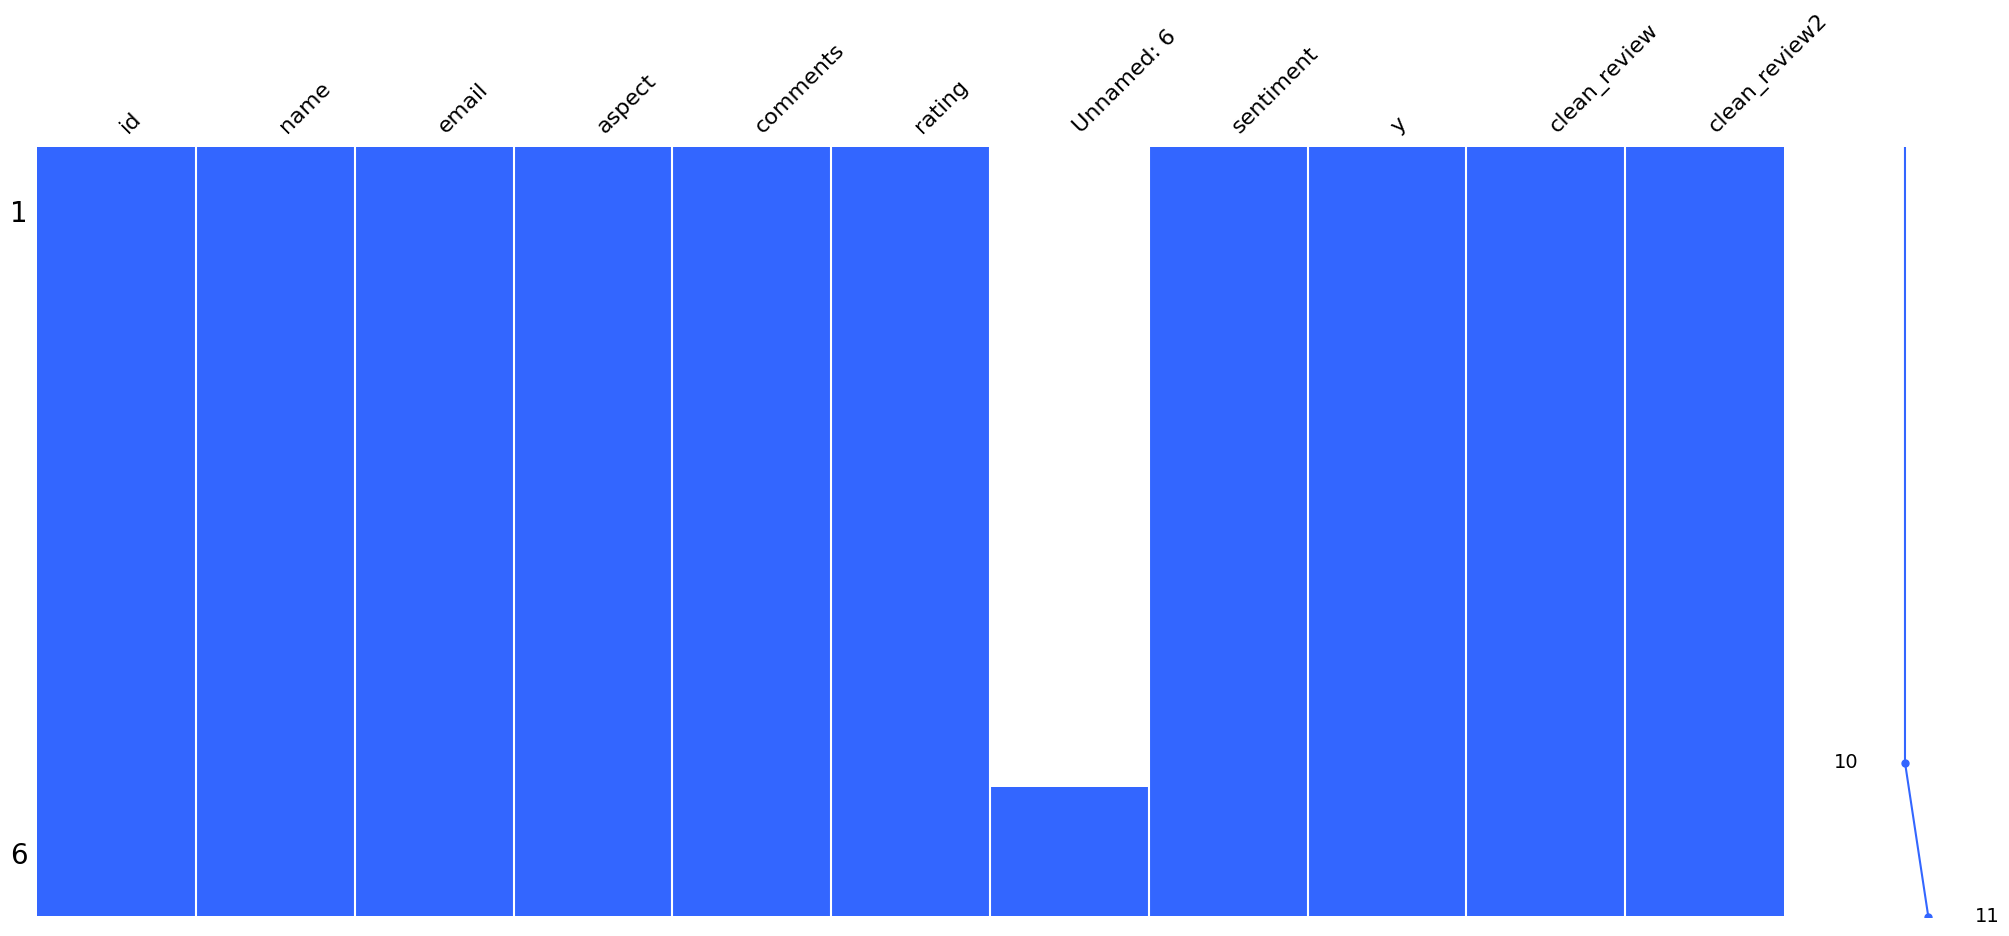

In [51]:
import missingno as msno  #type: ignore
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [52]:
import re
def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text
# Example string with weird font characters plus an URL which we gonna remove.
sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 \n https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

Text before removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
 https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


In [53]:
print("\u00C7", "\u0043\u0327")
print("\u00C7" == "\u0043\u0327")
print("Ç" == "Ç")

Ç Ç
False
False


In [63]:
import unicodedata as uni
print(f"Text before Unicode Normalization:- \n {sample}")
sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")

Text before Unicode Normalization:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook


In [64]:
import demoji  #type: ignore
def handle_emoji(string):
    emojis = demoji.findall(string)
    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])
    return string
print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

Before Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook
After Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am  smiling face with smiling eyes to create this notebook


In [65]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()
    return text
sample = "Hi Everyone I am Ankit Gupta."
print(sample)
print(word_tokenizer(sample))

Hi Everyone I am Ankit Gupta.
['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']


In [67]:
from nltk.corpus import stopwords#type: ignore
en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")

Stop Words in English : 
{'just', 'had', 'its', 'do', 'be', 'because', 'about', 'she', 'during', 'most', 'too', 'below', 'the', 'over', 'these', 'd', 'won', 'did', 'doesn', 'have', 'further', "didn't", 'out', 'in', 'after', 'y', 'weren', 'if', 'am', 'there', "don't", 'isn', 'her', 'themselves', 'does', 'theirs', 'will', 'under', 'them', 'which', "hasn't", 'shouldn', 'myself', "mightn't", 'were', "needn't", 'down', 'only', 'how', 'himself', 'haven', "wasn't", 'above', "it's", 'him', 'they', 'once', 've', 'this', 'our', 'why', 'hadn', 'same', 'so', 'an', "you're", 'it', 'yours', 'he', 'his', "shan't", 'whom', 'very', 'yourself', "that'll", "she's", 'needn', 'at', 'couldn', 'until', "isn't", 'can', "should've", 'off', 'against', 'itself', 'then', 'few', 'hasn', 'was', "couldn't", "haven't", 'to', 'with', "weren't", 'who', 'aren', 'of', 'shan', 'between', 'through', 'more', 'such', "you'd", 'other', 'what', "you've", 'their', 'nor', 'where', 'all', "doesn't", 'are', 'hers', 'here', 'than',

In [68]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text
print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

Before removing stopwords : ['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']
After removing stopwords : ['hi', 'everyone', 'ankit', 'gupta.']


In [69]:
from nltk.stem.porter import PorterStemmer#type: ignore
from nltk.stem.lancaster import LancasterStemmer#type: ignore
stemmer = PorterStemmer()
# stemmer = LancasterStemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text
sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")

Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


In [70]:
import spacy#type: ignore
sp = spacy.load("en_core_web_sm")
def lemmatization(text):
    # text = [sp(word).lemma_ for word in text]
    text = " ".join(text)
    token = sp(text)
    text = [word.lemma_ for word in token]
    return text

print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


In [71]:
from langdetect import detect #type: ignore
en_text = u""""Hi Everyone I am Ankit Gupta."""
print(f" {en_text} : {detect(en_text)}")

hindi_text = u"""मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ"""
print(f"{hindi_text} : {detect(hindi_text)}")

 "Hi Everyone I am Ankit Gupta. : tl
मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ : hi


In [73]:
# Assigning labels to each review
def label(y):
    if y=='Excellent':
        return 3
    elif y=='Very Good':
        return 2
    elif y=='Good':
        return 1
    else:
        return -1

from tqdm import tqdm#type: ignore
tqdm.pandas()
df['y'] = df.sentiment.progress_map(label)
df

100%|██████████| 6/6 [00:00<?, ?it/s]


,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


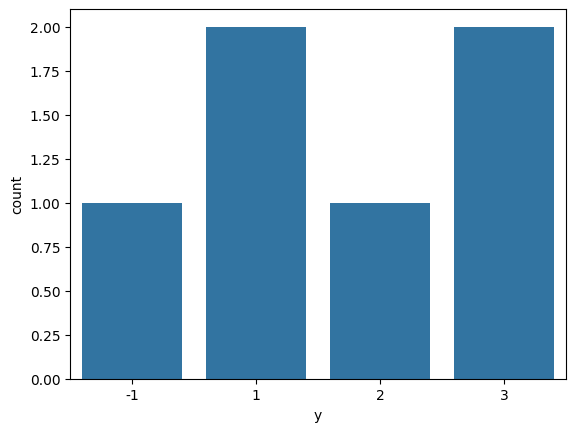

In [74]:
import seaborn as sns#type: ignore
sns.countplot(x = "y", data = df)
plt.show()

In [75]:
P1 = df[(df['sentiment'] == 'Good')]
positive = list(P[(P['comments'].str.len() > 4) & (P['comments'].str.len() < 350)]['comments'])
len(positive)

2

In [76]:
P2 = df[(df['sentiment'] == 'Bad')]
negative1 = list(P2[(P2['comments'].str.len() > 4) & (P2['comments'].str.len() < 350)]['comments'])
len(negative1)

1

In [77]:
P3 = df[(df['sentiment'] == 'Very Good')]
v_positive = list(P3[(P3['comments'].str.len() > 4) & (P3['comments'].str.len() < 350)]['comments'])
len(v_positive)

1

In [78]:
P4 = df[(df['sentiment'] == 'Excellent')]
vvpositive = list(P4[(P4['comments'].str.len() > 4) & (P4['comments'].str.len() < 350)]['comments'])
len(vvpositive)

2

In [79]:
import nlpaug.augmenter.word as naw #type: ignore
positive[0:49]

['The tourist place had provided good services',
 'The relaxed ambience of Thrissur was popular with temples.']

In [80]:
v_positive[0:49]

['Hotel services were good']

In [81]:
vvpositive[0:49]

['The food given in the restaurant was delicious. I found it enjoyable!',
 'The historical prestige and the hotel ambience was good and the service was on point. Good trip!']

In [82]:
negative1[0:49]

['I became ill, so I was admitted in a hospital for 3 days.']

In [83]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=en_stopwords, tokenizer=None,
                     reverse_tokenizer=None, stopwords_regex=None, verbose=0)
aug_negative = aug.augment(positive)
len(aug_negative)

2

In [85]:
def preprocessing(text):
    text = remove_url(text)
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)
    return text
from tqdm import tqdm#type: ignore
tqdm.pandas()
df['clean_review'] = df['comments'].progress_map(preprocessing)
df

100%|██████████| 6/6 [00:00<00:00, 65.55it/s]


,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


In [86]:
df.head()

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"


In [87]:
reviews = df.clean_review.values.tolist()
from tqdm import tqdm#type: ignore
tqdm.pandas()
df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 6/6 [00:00<00:00, 6019.09it/s]


In [88]:
df['clean_review2']

0             [tourist, place, provide, good, service]
1    [food, give, restaurant, delicious, i, find, e...
2       [relaxed, ambience, thrissur, popular, temple]
3    [historical, prestige, hotel, ambience, good, ...
4                               [hotel, service, good]
5         [i, become, ill, i, admit, hospital, 3, day]
Name: clean_review2, dtype: object

In [89]:
data_words = df['clean_review2'].values.tolist()
print(data_words)
print(len(data_words))

[['tourist', 'place', 'provide', 'good', 'service'], ['food', 'give', 'restaurant', 'delicious', 'i', 'find', 'enjoyable'], ['relaxed', 'ambience', 'thrissur', 'popular', 'temple'], ['historical', 'prestige', 'hotel', 'ambience', 'good', 'service', 'point', 'good', 'trip'], ['hotel', 'service', 'good'], ['i', 'become', 'ill', 'i', 'admit', 'hospital', '3', 'day']]
6


In [90]:
import gensim.corpora as corpora#type: ignore
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [91]:
from gensim.models import LdaMulticore#type: ignore
from gensim.models import LdaModel#type: ignore
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.141*"good" + 0.141*"place" + 0.141*"provide" + 0.141*"tourist" + '
  '0.141*"service" + 0.013*"hotel" + 0.013*"ambience" + 0.013*"i" + '
  '0.013*"popular" + 0.013*"thrissur"'),
 (1,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"ambience" + '
  '0.036*"i" + 0.036*"popular" + 0.036*"temple" + 0.036*"provide" + '
  '0.036*"place" + 0.036*"tourist"'),
 (2,
  '0.112*"i" + 0.112*"find" + 0.112*"give" + 0.112*"delicious" + '
  '0.112*"enjoyable" + 0.112*"restaurant" + 0.112*"food" + 0.010*"good" + '
  '0.010*"service" + 0.010*"hotel"'),
 (3,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"ambience" + '
  '0.036*"i" + 0.036*"popular" + 0.036*"place" + 0.036*"relaxed" + '
  '0.036*"temple" + 0.036*"thrissur"'),
 (4,
  '0.190*"service" + 0.190*"hotel" + 0.190*"good" + 0.017*"i" + '
  '0.017*"ambience" + 0.017*"popular" + 0.017*"food" + 0.017*"temple" + '
  '0.017*"thrissur" + 0.017*"provide"'),
 (5,
  '0.036*"service" + 0.036*"good" + 0.036*"hotel" + 0.036*"i" 

In [92]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 1.92 s
Wall time: 1.92 s


In [93]:
%%time
from gensim.models import FastText
fasttext_model1 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model1)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 2.17 s
Wall time: 2.3 s


In [94]:
%%time
from gensim.models import FastText
fasttext_model2 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model2)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 1.92 s
Wall time: 1.98 s


In [95]:
%%time
from gensim.models import FastText
fasttext_model3 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model3)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 2.05 s
Wall time: 2.07 s


In [96]:
fasttext_model.save("FastText-Model-For-ABSA.bin")#type: ignore
print(fasttext_model.wv.n_similarity("Very Good","service"))#type: ignore
print(fasttext_model.wv.n_similarity("Hotel services were good","service"))#type: ignore

0.15506542
0.73245305


In [97]:
fasttext_model1.save("FastText-Model-For-ABSA1.bin")#type: ignore
print(fasttext_model1.wv.n_similarity("Bad","hospitality"))#type: ignore
print(fasttext_model1.wv.n_similarity("I became ill, so I was admitted in a hospital for 3 days.","hospitality"))#type: ignore

0.32133222
0.5149182


In [98]:
fasttext_model2.save("FastText-Model-For-ABSA2.bin")#type: ignore
print(fasttext_model2.wv.n_similarity("Good","ambience"))#type: ignore
print(fasttext_model2.wv.n_similarity("The relaxed ambience of Thrissur was popular with temples.","ambience"))#type: ignore

-0.019609725
0.58824587


In [99]:
fasttext_model3.save("FastText-Model-For-ABSA3.bin")#type: ignore
print(fasttext_model3.wv.n_similarity("Excellent","food"))#type: ignore
print(fasttext_model3.wv.n_similarity("The food given in the restaurant was delicious. I found it enjoyable!","food"))#type: ignore

-0.10728479
0.25900412


In [100]:
aspect = ["service","food","ambience","hospitality"]
def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)   #type: ignore
    except:
        return 0

In [101]:
aspect = ["service","food","ambience","hospitality"]
def get_similarity1(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model1.wv.n_similarity(text, aspect)#type: ignore
    except:
        return 0

In [102]:
aspect = ["service","food","ambience","hospitality"]
def get_similarity2(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model2.wv.n_similarity(text, aspect)#type: ignore
    except:
        return 0

In [103]:
aspect = ["service","food","ambience","hospitality"]
def get_similarity3(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model3.wv.n_similarity(text, aspect)#type: ignore
    except:
        return 0

In [104]:
df.to_csv("Trip11.csv", index = True)
import torch                                 #type: ignore
from torch import nn                         #type: ignore
from torch.utils.data import Dataset          #type: ignore
from torch.utils.data import DataLoader   #type: ignore
from torch.utils.data import RandomSampler  #type: ignore
import warnings
print(torch)
print(nn, tf)

<module 'torch' from 'c:\\Users\\hp\\anaconda3\\envs\\py310\\lib\\site-packages\\torch\\__init__.py'>
<module 'torch.nn' from 'c:\\Users\\hp\\anaconda3\\envs\\py310\\lib\\site-packages\\torch\\nn\\__init__.py'> <module 'tensorflow' from 'c:\\Users\\hp\\anaconda3\\envs\\py310\\lib\\site-packages\\tensorflow\\__init__.py'>


In [105]:
class config:
    warnings.filterwarnings("ignore", category = UserWarning)
    IMG_SIZE = (224,224)
    DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
    FOLDS = 5
    SHUFFLE = True
    BATCH_SIZE = 32
    LR = 0.01
    EPOCHS = 30
    EMB_DIM = 100
    MAX_LEN = 20
    MODEL_PATH = "./Models/MyModel.pt"

In [106]:
df.head(6)

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


In [107]:
class Vocabulary:
  
    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()} 
        
        self.freq_threshold = freq_threshold
        self.max_size = max_size
    
    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)
    
    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]
    
    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk
        #calculate freq of words
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1
        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold} 
        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk
        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1
    '''
    convert the list of words to a list of corresponding indexes
    '''    
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])
                
        return numericalized_text

In [108]:
from torch.utils.data import Dataset  # #type: ignore

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''
    
    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):
    
        self.df = df
        self.transform = transform
        
        #get source and target texts
        self.source_texts = self.df[source_column]
        
        
        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())

        
    def __len__(self):
        return len(self.df)
    
    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]
        
        if self.transform is not None:
            source_text = self.transform(source_text)
            
        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["<SOS>"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["<EOS>"])
        
        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.y[index])

In [109]:
df.head()

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"


In [110]:
dataset = CustomDataset(df, "clean_review")
len(dataset.source_vocab.stoi)

5

In [111]:
import pickle
with open('dataset-new', 'wb') as dataset_file:
  # Step 3
    pickle.dump(dataset, dataset_file, pickle.HIGHEST_PROTOCOL)
# import pickle

In [112]:
def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):
    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0
    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1
    print(f"Words found are : {words_found}")
    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False
    return emb_layer

In [113]:
class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen
    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch]
        #pad them using pad_sequence method from pytorch.
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)
        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)
        for idx, text in enumerate(source):
            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]
        #get all target indexed sentences of the batch
        target = [item[1] for item in batch]
        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target

In [114]:
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()


        
    def forward(self, text):
        
        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#         assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = self.fc1(y_pred)
        y_pred = self.fc2(y_pred)
        y_pred = self.sigmoid(y_pred)
        return y_pred

In [115]:
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0

    model.train()

    for review, label in tqdm(dataloader):

        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()
        
    return train_loss, train_correct

In [116]:
def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0
    
    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        
        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)
        
        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction = 
    return val_loss, val_correct

In [117]:
from sklearn.model_selection import StratifiedKFold#type: ignore
from sklearn.model_selection import KFold#type: ignore
from torch.utils.data import SubsetRandomSampler  #type: ignore
from torch.optim import Adam #type: ignore
from tqdm import tqdm#type: ignore
from torch.utils.data import DataLoader  #type: ignore
import matplotlib.pyplot as plt #type: ignore


# sfk = StratifiedKFold(n_splits = config.FOLDS)
kfold = KFold(n_splits = config.FOLDS)
model_state_dicts = {}
 
for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(dataset)))):
    
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    
    train_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = train_sampler, collate_fn = MyCollate(0, config.MAX_LEN))
    val_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = val_sampler, collate_fn = MyCollate(0, config.MAX_LEN))  
    
    VOCAB_SIZE = len(dataset.source_vocab)
    HIDDEN_DIM = 128
    OUTPUT_DIM = 1
    VOCAB = list(dataset.source_vocab.stoi)

    embedding_layer = get_emb_layer_with_weights(target_vocab = VOCAB, emb_model = fasttext_model, trainable = False) #type: ignore

    model = Model(VOCAB_SIZE, config.EMB_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_layer)
    model = model.to(config.DEVICE)
    
#     model
#     model = Model(2, len(dataset.source_vocab), 128, 100, 1 ).to(config.DEVICE)
#     hidden = model.init_hidden(config.BATCH_SIZE)
#     model.hidden = hidden

    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    print(f"-----------------------------------------------------------{fold}-fold of the model-----------------------------------------------------------")
    for epoch in range(config.EPOCHS):
        train_loss, train_correct = train_epochs(train_loader, model, loss_fn, optimizer)
        val_loss, val_correct = val_epochs(val_loader, model, loss_fn)  
        
        train_loss = train_loss/len(train_loader.sampler)
        val_loss = val_loss/len(val_loader.sampler)
        train_acc = (train_correct/len(train_loader.sampler))*100
        val_acc = (val_correct/len(val_loader.sampler))*100
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc.cpu().numpy().tolist())
        val_accs.append(val_acc.cpu().numpy().tolist())
        
        print(f"| Train Loss : {train_loss} |", end = " ")
        print(f" Val Loss : {val_loss} |", end = " ")
        print(f"Train Acc : {train_acc} |", end = " ")
        print(f"Val Acc : {val_acc} |")

        
    # Saving the state dicts for the model
    model_state_dicts.update({f"LSTM-Model-for-{fold}" : model.state_dict(),
                             f"Model-Optimizer-for-{fold}" : optimizer.state_dict()})

Words found are : 5
Embedding(5, 100)
-----------------------------------------------------------0-fold of the model-----------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]


RuntimeError: all elements of target should be between 0 and 1

In [118]:
torch.save(model_state_dicts, "My-Model.pt")

In [119]:
tf.constant(23)

<tf.Tensor: shape=(), dtype=int32, numpy=23>

In [120]:
def numericalize(text):
    numerialized_source = [] 
    numerialized_source = [dataset.source_vocab.stoi["<SOS>"]]
    numerialized_source += dataset.source_vocab.numericalize(text)
    numerialized_source.append(dataset.source_vocab.stoi["<EOS>"])
    return numerialized_source
def padding(source):
    padded_sequence = torch.zeros(config.MAX_LEN, 1, dtype = torch.int)
    source = torch.tensor(source)
    if len(source) > config.MAX_LEN:
        padded_sequence[:, 0] = source[: config.MAX_LEN]
    else:
        padded_sequence[:len(source), 0] = padded_sequence[:len(source), 0] + source
    return padded_sequence

In [121]:
t0 = "Hotel services were good"    #,service,Very Good
t1 = "I became ill, so I was admitted in a hospital for 3 days."    #Bad,hospitality
t2 = "The relaxed ambience of Thrissur was popular with temples."   #Good,ambience
t3 = "The food given in the restaurant was delicious. I found it enjoyable!" #Excellent,food



sample = "beautiful"
sample2= "The historical prestige and the hotel ambience was good and the service was on point. Good trip!"
destination = aspect

    
def best_aspect(text, aspects):
    a = []
    
    for aspect in aspects:
        a.append(get_similarity(text, aspect))
    
    return aspects[np.argmax(a)]
def infer_processing(text):
    
    text = preprocessing(text)
    text = numericalize(text)
    text = padding(text)
    return text
ba0 = best_aspect(preprocessing(t0), destination)

a0 = infer_processing(t0).to(config.DEVICE)

model.eval()
sentiment = model(a0)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

print(f"The reviewer is talking {sentiment} about the {ba0} of the trip in his/her comment")

The reviewer is talking Negatively about the service of the trip in his/her comment


In [122]:
ba1 = best_aspect(preprocessing(t1), destination)

a1 = infer_processing(t1).to(config.DEVICE)

model.eval()
sentiment = model(a1)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

print(f"The reviewer is talking {sentiment} about the {ba1} of the trip in his/her comment")

The reviewer is talking Negatively about the hospitality of the trip in his/her comment


In [123]:
ba2 = best_aspect(preprocessing(t2), destination)
a2 = infer_processing(t2).to(config.DEVICE)
model.eval()
sentiment = model(a2)
sentiment = sentiment.cpu().detach().numpy()[0]
if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'
print(f"The reviewer is talking {sentiment} about the {ba2} of the trip in his/her comment")

The reviewer is talking Negatively about the ambience of the trip in his/her comment


In [124]:
ba3 = best_aspect(preprocessing(t3), destination)
a3 = infer_processing(t3).to(config.DEVICE)
model.eval()
sentiment = model(a3)
sentiment = sentiment.cpu().detach().numpy()[0]
if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'
print(f"The reviewer is talking {sentiment} about the {ba0} of the trip in his/her comment")

The reviewer is talking Negatively about the service of the trip in his/her comment
